<div style="border:solid Chocolate 2px; padding: 40px">

Андрей, привет, меня зовут Станислав Коротченко, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это неудобно - дай знать, и мы перейдем на «вы».
Это учебный проект и здесь не стоит бояться делать ошибки, я хочу поделиться своим опытом и помочь тебе стать аналитиком данных.
Уже выполнена большая работа над проектом, давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий с замечанием ревьюера:</b> Так выделены самые важные замечания. Как только ты их исправишь проект будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий с небольшим замечанием или советом ревьюера:</b> Так выделены небольшие замечания или советы. 
</div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера

<div class="alert alert-success">

Проделана хорошая аналитическая работа. Код написан чисто, соблюдена структура проекта, написаны логичные и обоснованные выводы. Проект выполнен на хорошем аналитическом уровне, поэтому замечаний не много. Я отметил в проекте моменты, на которые необходимо обратить внимание, исправь их и проект будет принят.

- по ссылкам ниже интересные материалы по А/В тестам
  
    
https://habr.com/ru/company/avito/blog/571094/

https://habr.com/ru/company/yandex/blog/476826/

https://academy.yandex.ru/journal/kak-provesti-a-b-testirovanie-6-prostykh-shagov

https://habr.com/ru/company/yandex/blog/342704/

https://r-analytics.blogspot.com/2013/10/blog-post_13.html 

</div>

<div class="alert alert-danger">

- добавь, пожалуйста, подписи осей для всех графиков в проекте

</div>




<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера в2

<div class="alert alert-success">

Отлично, замечания исправлены корректно, работу принимаю и желаю успеха в следующих проектах

# Проект по анализу гипотез для увеличения выручки интернет-магазина

## Описание проекта

Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Необходимо приоритизируйте гипотезы, запустить A/B-тест и проанализируйте результаты. 

**Часть 1. Приоритизация гипотез.**

**Задачи:**
* Приоритизировать гипотезы через фреймворк ICE. 
* Приоритизировать гипотезы через фреймворк RICE.
* Проанализировать изменение приоритизацим гипотез при применении RICE вместо ICE.

**Часть 2. Анализ A/B-теста**

**Задачи:**

Проанализировать A/B-тест:
* Построить график кумулятивной выручки по группам.
* Построить график кумулятивного среднего чека по группам.
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A. 
* Построить график кумулятивного среднего количества заказов на посетителя по группам.
* Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
* Построить точечный график количества заказов по пользователям.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
* Построить точечный график стоимостей заказов. 
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Принять решение по результатам теста и объяснить его:
* Остановить тест, зафиксировать победу одной из групп
* Остановить тест, зафиксировать отсутствие различий между группами
* Продолжить тест.

## Описание данных

**Данные для первой части**

Файл /datasets/hypothesis.csv. 

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Файл /datasets/orders.csv.

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
  

Отличная вводная часть, полное описание предстоящих задач.  
<div>


In [1]:
# Импорт необходимых библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

##  Приоритизация гипотез.

In [2]:
# выгрузка данных из файла hypothesis.csv

data = pd.read_csv('/datasets/hypothesis.csv')

# вывод содержимого датафрейма

pd.set_option('display.max_colwidth', False)
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5



<div class="alert alert-warning">
<b>Комментарий с советом ревьюера:</b> 
    
Чтобы названия гипотез выводились целиком, используй настройку pd.set_option('display.max_colwidth', False)
 </div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Сделано.</div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
  

Отлично  
<div>


### Приоритизация гипотез через фреймворк ICE

In [3]:
# Расчет ICE и сохрание результатов в отдельный столбец

data['ICE'] = round(data['Impact']*data['Confidence']/data['Efforts'],1)


# Вывод названия категории и приоритета 

data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


### Приоритизация гипотез через фреймворк RICE

In [4]:
# Расчет RICE и сохрание результатов в отдельный столбец

data['RICE'] = data['Reach']*data['Impact']*data['Confidence']/data['Efforts']

# Вывод названия категории и приоритета 
data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Вывод: 
По методу ICE наибольшую оценку получили гипотезы 8, 0, 7. 
По методу RICE приоритеты изменились на гпиотезы 7,2,0. 

Это объясняется тем, что в случае фреймворка ICE, в отличие от RICE, не учитывается охват изменений, тогда как это важная составляющая оценки гипотез.

Для данного исследования возьмем за основу приоритизацию по методу RICE и гипотезы 7, 2, 0.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Гипотезы проанализированы верно, молодец.

Здорово, что указано на изменение приоритетов при учете охвата.
</div>


## Анализ A/B-теста

In [5]:
# Выгрузка данных из файла orders.csv

orders = pd.read_csv('/datasets/orders.csv')

# Вывод первых 5 строк таблицы

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
# Выгрузка данных из файла visitors.csv

visitors = pd.read_csv('/datasets/visitors.csv')

# Вывод первых 5 строк таблицы

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Предобработка данных

In [7]:
# Проверим таблицу visitors на наличие пропусков
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
# Проверим таблицу visitors на наличие дубликатов
visitors.duplicated().sum()

0

In [9]:
# Приведем тип данных в столбце date таблицы orders к формату datetime
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
# Проверим таблицу orders на наличие пропусков
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
# Проверим таблицу orders на наличие дубликатов
visitors.duplicated().sum()

0

In [12]:
# Приведем тип данных в столбце date таблицы orders к формату datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [13]:
# Проверим группы на совпадение пользователей

# Отберем пользователей группы А
group_a = orders.query('group == "A"')

# Отберем пользователей группы B
group_b = orders.query('group == "B"')

#Отберем пользователей, которые попали в обе группы через объединение таблиц
visitors_ab = pd.merge(group_a, group_b, on='visitorId')

print('Количестов пользователей в группе A:', group_a['visitorId'].nunique())
print('Количестов пользователей в группе B:', group_b['visitorId'].nunique())
print('Количество одинаковых пользователей в группах:', visitors_ab['visitorId'].nunique())

Количестов пользователей в группе A: 503
Количестов пользователей в группе B: 586
Количество одинаковых пользователей в группах: 58


In [14]:
# Удалим пользователей, которые присутствуют в двух группах сразу

orders = orders.query('visitorId not in @visitors_ab["visitorId"]')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Вывод: 
* Пропуски и дубликаты в таблицах отсутствуют. 
* Тип данных в столбце date в таблицах изначально имеет неправильный формат и был приведен к формату datetime. 
* Удалены пользователи, которые присутвтуют одновременно в двух выборках (8% данных).

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Данные корректно подготовлены к работе.
</div>


<div class="alert alert-warning">
<b>Комментарий с небольшим замечанием или советом ревьюера:</b>
  
Здорово, что пересекающиеся пользователи обработаны. Всегда необходимо обращать внимание на такие ошибки, но надо внимательно относиться к обработке таких данных.    
    
Одни и те же пользователи попали в две группы теста — это говорит об ошибке в сборе данных. Удаление этих пользователей повлияет на конверсию, поскольку мы можем удалить этих пользователей из таблицы с заказами, но не сможем удалить из таблицы с визитами, поскольку там данные уже агрегированы за день.


  </div>


### Построение графика кумулятивной выручки по группам

In [15]:
# создаем массив уникальных пар значений дат и групп теста

datesGroups = orders[['date','group']].drop_duplicates() 

# получаем агрегированные кумулятивные по дням данные о заказах 

ordersAggregated = (datesGroups.apply(
                    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

visitorsAggregated = (datesGroups.apply(
                        lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                        .sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


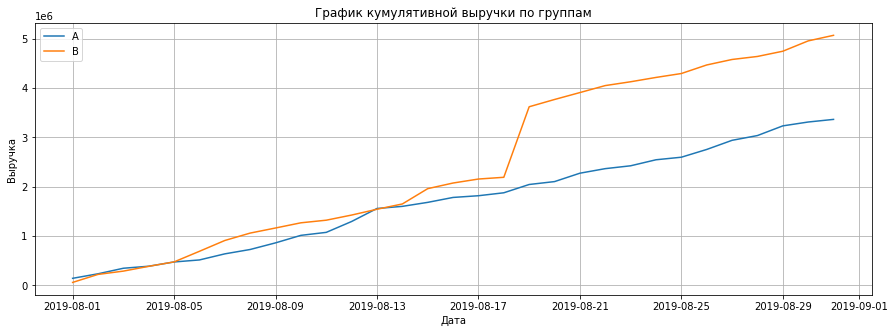

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

<div class="alert alert-danger">
<b>Комментарий с замечанием ревьюера:</b>
    
Графики в проекте будут смотреться лучше, если добавить подписи осей
  </div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Сделано. Подписи осей для всех графиков добавлены</div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
  

Отлично  
<div>

Выводы:
Группа B показывает стабильно большую выручку, чем группа "A". Выручка почти равномерно увеличивается в течение всего теста. Однако график выручки группы "B" в одной точке резко растет после 18.08.2019. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
График интерпретирован верно, здорово, что выдвинуто предположение природы появления всплеска.
</div>


### Построение графика кумулятивного среднего чека по группам.

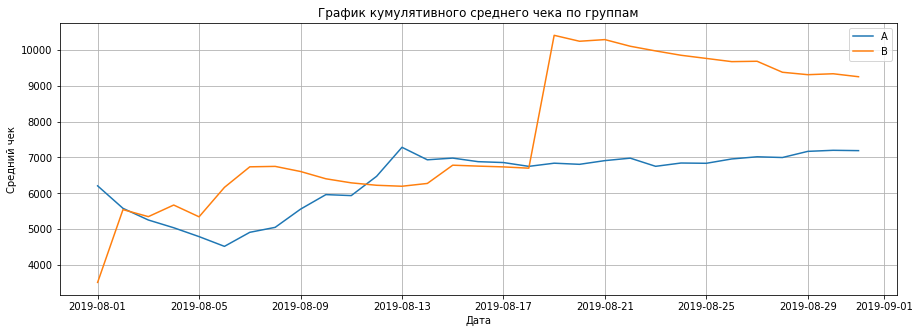

In [17]:
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')


plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

Выводы: Средний чек по группам становится равномерным ближе к концу теста: показывает небольшой рост для группы "A" и падение для группы "B". Также присутствует резкий подъем среднего чека для группы B после 18.08.2019. Возможно, в группу B попали крупные заказы (резкий всплеск на графике).

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Согласен с выводом по графику.
</div>


### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

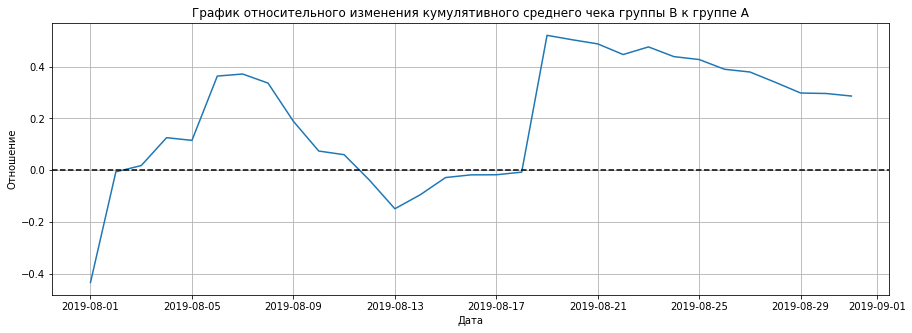

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Отношение')
plt.xlabel('Дата')

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

В нескольких точках график различия между сегментами резко «скачет». Вероятно где-то (скорее всего в группе В) есть крупные заказы и выбросы.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Сначала средний чек группы B стабильно растет, потом резко падает и снова растет. Согласен, влияние крупных заказов.   
</div>


### Построение графика кумулятивного среднего количества заказов на посетителя по группам.

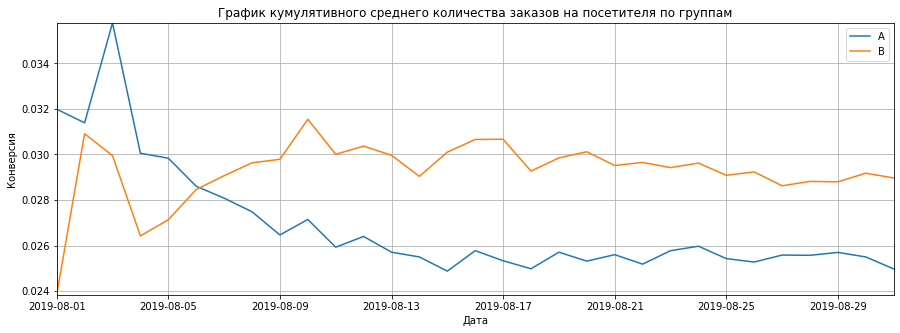

In [19]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Конверсия')
plt.xlabel('Дата')


plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([min(cumulativeData['date']), 
          max(cumulativeData['date']), 
          min(cumulativeData['conversion']), 
          max(cumulativeData['conversion'])]);

Вывод: Среднее количество заказов на посетителя в общем у группы В выше, хотя у группы А был всплекс в начале и количество было выше группы B. После резких скачков в превую неделю среднее количество заказов зафиксировалась и показывает относительно стабильную динамику. 

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Все верно, среднее количество заказов группы В продолжает выигрывать до конца. 
    
Только согласно ТЗ мы анализируем среднее количество заказов, а не конвервсию, скорректируй, пожалуйста, формулировку вывода.
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Сделано. Вывод скорректирован</div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
  

Отлично  
<div>

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

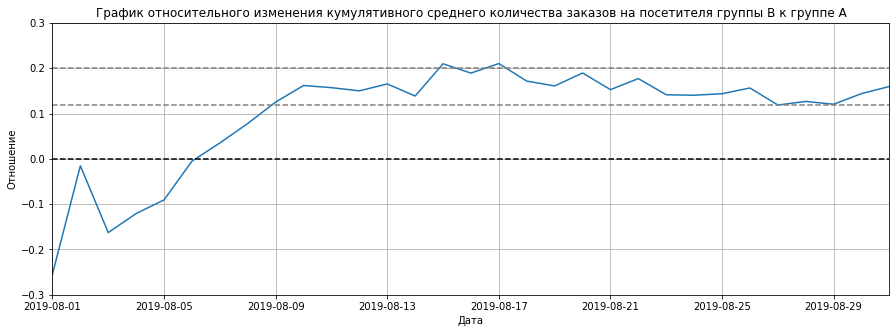

In [20]:
mergedCumulativeConversions = (
        cumulativeDataA[['date','conversion']]
        .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
    )
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Отношение')
plt.xlabel('Дата')

plt.plot(
        mergedCumulativeConversions['date'], 
        mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
        label="Относительный прирост конверсии группы B относительно группы A"
)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([min(cumulativeData['date']), max(cumulativeData['date']), -0.3, 0.3]);

Вывод: Данный график подтверждает выводы по предыдущему графику. Через неделю среднее количество заказов в группе B стабильно выше чем в группе A более чем на 12%.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Все верно, здорово, что для анализа была использована axhline.
    
    
Здесь также сформуируй с учетом ТЗ, рекомндую убрать легенду, поскольку она не несет смысловой нагрузки и занимает значительное место на графике.


### Построение точечного графика количества заказов по пользователям.

In [21]:
# Подсчет количества заказов по пользователям

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

# Переименуем столбцы

ordersByUsers.columns = ['visitorId', 'orders']


ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


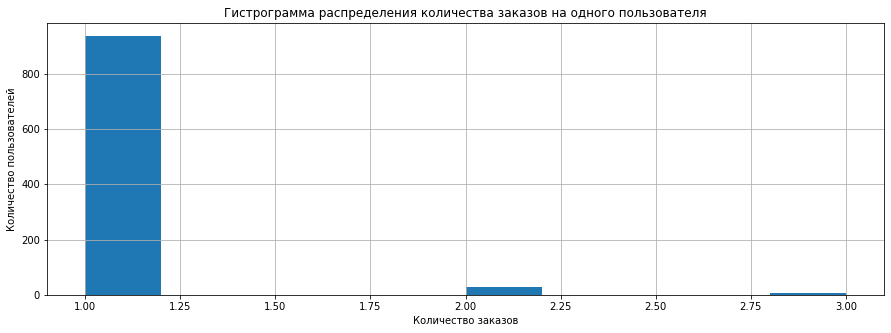

In [22]:
# Построим гистрограмму распределения количества заказов на одного пользователя.

plt.figure(figsize=(15,5))
plt.grid()
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.hist(ordersByUsers['orders'], bins = 10); 

Вывод: Большинство пользователей заказывали один раз, также есть большое количество пользователй с 2-3 заказами.

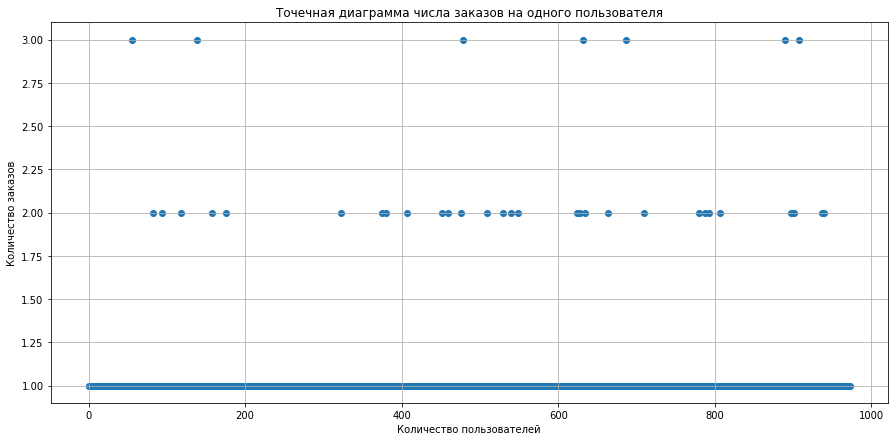

In [23]:
# Построим точечную диаграмму числа заказов на одного пользователя

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,7))
plt.grid()
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.scatter(x_values, ordersByUsers['orders']) 

Вывод: Точечная диаграмм подвтверждает выводы, что большинство пользователей сделали один заказ, а также много пользователей с 2-3 заказами

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Отлично


### Подсчет 95-го и 99-го перцентилей количества заказов на пользователя.

In [24]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Вывод: Не более 1% пользователей оформили больше чем 2 заказа.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>

95-й и 99-й перцентили определены верно, нижняя граница числа заказов выбрана корректно, молодец.</div>


### Построение точечного графика стоимостей заказов.

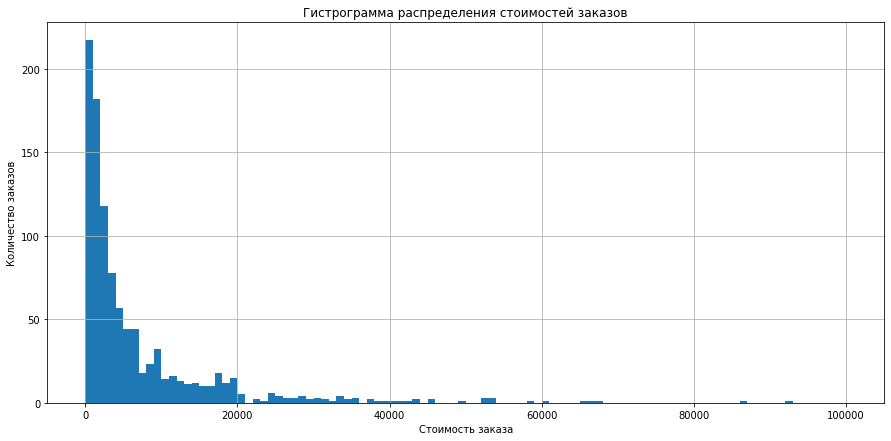

In [25]:
# Построим гистогамму распределения стоимостей заказов

plt.figure(figsize=(15,7))
plt.grid()
plt.title('Гистрограмма распределения стоимостей заказов')
plt.ylabel('Количество заказов')
plt.xlabel('Стоимость заказа')
plt.hist(orders['revenue'], range=(0,100000), bins=100);

Вывод: Большинство сделаных заказов имеют выручку меньше 20000.

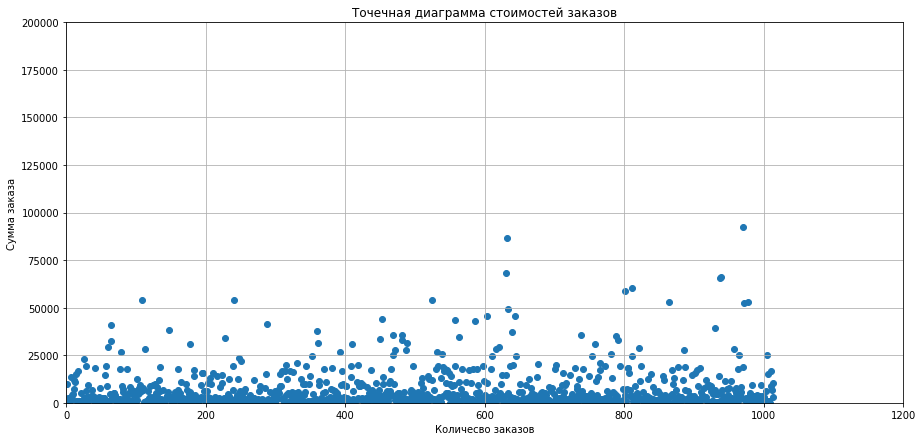

In [26]:
# Построим точечную диаграмму стоимостей заказов

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15,7))
plt.grid()
plt.title('Точечная диаграмма стоимостей заказов')
plt.ylabel('Сумма заказа')
plt.xlabel('Количесво заказов')
plt.axis([0, 1200, 0, 200000])

plt.scatter(x_values, orders['revenue']);

Вывод: Большинство пользователей делает заказы на сумму менее 25000 рублей.


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
График построен правильно, видны аномалии. </div>


### Подсчет 95-го и 99-го перцентилей стоимости заказов.

In [27]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Вывод: Не более 5% пользователей делали заказ на сумму более 26785, менее 1% заказ более 53904. Соответственно будем считать все заказы стоимостью более чем 53904 рублей аномальными.

<div class="alert alert-warning">
<b>Комментарий с небольшим замечанием ревьюера:</b>
    
Согласно заданию, здесь надо выбрать нижнюю границу стоимости заказов.
 
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Сделано. Граница указана</div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
  

Отлично  
<div>

### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами 'visitorId', 'orders'. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [28]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Переменная sampleA должна состоять из двух частей:
* Список с количеством заказов для каждого из пользователей.
* Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах.

In [29]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 

* Нулевая гипотеза: Конверсия в группе A равна группе B (статистическая значимость не значительна и сделать вывод о различии нельзя)
* Альтернативная гипотеза: Конверсия в группе A не равна группе B (между выборками имеется статистическая значимость)

Применим критерий Манна-Уитни. 

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Гипотезы сформулированы верно, молодец.
</div>


In [30]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный показатель 'B' и 'A' =  {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

p-value = 0.011
Относительный показатель 'B' и 'A' =  0.160


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Все верно, молодец, что используешь форматированный вывод.
</div>


Вывод: P-value значительно меньше 0.05, не получилось подтвердить нулевую гипотезу. 
Конверсия в группе A не равна группе B (между выборками имеется статистическая значимость). Относительный прирост среднего группы В к конверсии группы А равен 16%.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Гипотеза проверена верно.
</div>


### Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Проверим статистическую значимость различий в среднем чеке между сегментами. 
* Нулевая гипотеза: Средний чек в группе А равен среднему чеку в группе В. 
* Альтернативная гипотеза:  Средний чек в группе A не равен среднему чеку в группе B. 

In [31]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


P-value значительно больше 0.05,  значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек в группе A равен среднему чеку в группе B.

Относительный прирост среднего чека группы В к группе А равен 28,7%

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Все верно. 

Если p-value > alpha значит средний чек группы B **равен** среднему чеку группы A (или не отличается). Наблюдаемое различие не значимо, получено случайно из-за единичных выбросов.

</div>


### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

На основании проведенного анализа мы получили данные, что большинство пользователей не делает более 2 заказов и сумма покупки не превышает 53904 рублей. 

Примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 53 904 рубля. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 53 904 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [99]))]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], [99]))]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [99]))]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64
16


<div class="alert alert-warning">
<b>Комментарий с советом ревьюера:</b> 

Лучше использовать код (расчет перцентилей) вместо ручного ввода аномальных значений. 
Это снизит возможные ошибки при повторном использовании кода.


<div class="alert alert-info"> <b>Комментарий студента:</b> Сделано. Значения заменены на код</div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
  

Отлично  
<div>

Количество аномальных пользователей - 16. Проанализируем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [33]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам.
* Нулевая гипотеза: Конверсия в группе A равна группе B (статистическая значимость не значительна и сделать вывод о различии нельзя)
* Альтернативная гипотеза: Конверсия в группе A не равна группе B (между выборками имеется статистическая значимость)

In [34]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.007
Относительный показатель 'B' и 'A' = 0.189


Вывод: P-value значительно меньше 0.05, не получилось подтвердить нулевую гипотезу. Конверсия в группе A не равна группе B (между выборками имеется статистическая значимость). Относительный прирост среднего группы В к конверсии группы А равен 18.9%, что выше, чем по неочищенным данным на 2,9%

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
    
Проверка проведена корректно, согласен группа B лучше группы A на 18.9%.


### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Проверим статистическую значимость различий в среднем чеке между сегментами.
* Нулевая гипотеза: Средний чек в группе А равен среднему чеку в группе В.
* Альтернативная гипотеза: Средний чек в группе A не равен среднему чеку в группе B.

In [35]:
print('{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)


print("{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
     )

0.788
-0.032


P-value значительно больше 0.05, значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек в группе A равен среднему чеку в группе B. Относительное снижение среднего чека группы В к группе А примерно равно 3%. Изменение по сравнению с прошлыми результатами - 25,5%.

Подтвердилась таже гипотеза, что и для неочищенных данных.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
 
Верно, сильное влияние аномалий.


## Выводы

Имеющиеся факты по проведенному тесту:
* Есть статистически значимые различия по конверсии между группами и по «сырым», и по данным после фильтрации аномалий. 
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
* График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к ухудшению.
* График различия среднего чека говорит о том, что результаты группы B лучше группы А на 28,7%: Но при отстутсвии анамалий мы видим незначительное снижение на 2%.

Исходя из обнаруженных фактов можно принять решение остановить тест, зафиксировать победу группы B над группой А. Группа B значительно лучше (эффективнее) группы A по конверсии, хотя по среднему чеку группы примерно равны

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
    
Решение верное.
    
Хороший аналитический вывод, вынесены основные показатели, которые получены в результате анализа.

Действительно группы равны по среднему чеку, а по среднему количеству заказов группа В лучше группы А.  


<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера

<div class="alert alert-success">

Проделана хорошая аналитическая работа. Код написан чисто, соблюдена структура проекта, написаны логичные и обоснованные выводы. Проект выполнен на хорошем аналитическом уровне, поэтому замечаний не много. Я отметил в проекте моменты, на которые необходимо обратить внимание, исправь их и проект будет принят.

- по ссылкам ниже интересные материалы по А/В тестам
  
    
https://habr.com/ru/company/avito/blog/571094/

https://habr.com/ru/company/yandex/blog/476826/

https://academy.yandex.ru/journal/kak-provesti-a-b-testirovanie-6-prostykh-shagov

https://habr.com/ru/company/yandex/blog/342704/

https://r-analytics.blogspot.com/2013/10/blog-post_13.html 

</div>

<div class="alert alert-danger">

- добавь, пожалуйста, подписи осей для всех графиков в проекте

</div>




<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера в2

<div class="alert alert-success">

Отлично, замечания исправлены корректно, работу принимаю и желаю успеха в следующих проектах